In [2]:
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

## 1. Problem Statement:

Below is the table containing the information of Customer price index, discounts, offers where the organization wants to predict the sales based on the cpi, discounts,offers.

Given below information find out the Sales that has \
5000 cpi , 3 percentage discounts, 20 rewards offers \
4000 cpi , 8 percentage discounts, 19 rewards offers



In [2]:
df = pd.read_excel('D:\PROJECTS\Final Project\Data set.xlsx', "Sales data")

In [3]:
df

,CPI,discounts,offers,Sales
0,2600,3,20,550000
1,3000,4,15,565000
2,3200,5,18,610000
3,3600,3,30,595000
4,4000,5,8,760000
5,4100,6,8,810000


In [14]:
reg = linear_model.LinearRegression()
reg.fit(df[["CPI","discounts","offers"]].values,df.Sales)

LinearRegression()

In [16]:
prediction_1  = reg.predict([[5000, 3, 20]])
prediction_2  = reg.predict([[4000, 8, 19]])

In [17]:
print(f"Predicted sales for (5000 CPI, 3 discounts, 20 offers): ${prediction_1[0]:,.2f}")
print(f"Predicted sales for (4000 CPI, 8 discounts, 19 offers): ${prediction_2[0]:,.2f}")

Predicted sales for (5000 CPI, 3 discounts, 20 offers): $826,645.35
Predicted sales for (4000 CPI, 8 discounts, 19 offers): $732,680.36


In [3]:
data = pd.read_excel('D:\PROJECTS\Final Project\Data set.xlsx', "Loan data")

In [21]:
data.head()

,Cutomer id,Cards,Debit card,Insurance,Age,Cibil Score,Loan offer
0,5,0.0,1.0,0.0,50.0,34.940,0
1,3,1.0,0.0,0.0,18.0,0.891,1
2,66,0.0,1.0,0.0,5.0,0.330,1
3,70,0.0,1.0,1.0,31.0,0.037,0
4,96,0.0,1.0,0.0,30.0,0.038,1


In [32]:
data.describe()

,Cutomer id,Cards,Debit card,Insurance,Age,Cibil Score,Loan offer
count,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000,1340.000000
mean,11202.001493,0.558735,0.907621,0.017028,28.414422,3.806307,0.488806
std,9512.750796,0.496725,0.289671,0.129425,20.304451,10.636903,0.500061
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4177.000000,0.000000,1.000000,0.000000,9.000000,0.400000,0.000000
50%,8756.500000,1.000000,1.000000,0.000000,30.000000,1.069500,0.000000
75%,15702.500000,1.000000,1.000000,0.000000,43.000000,3.781500,1.000000
max,34153.000000,1.000000,1.000000,1.000000,95.000000,173.604000,1.000000


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cutomer id   1340 non-null   int64  
 1   Cards        1328 non-null   float64
 2   Debit card   1299 non-null   float64
 3   Insurance    1292 non-null   float64
 4   Age          1151 non-null   float64
 5   Cibil Score  1340 non-null   float64
 6   Loan offer   1340 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


In [40]:
# Null values:
data.isnull().sum()

Cutomer id       0
Cards           12
Debit card      41
Insurance       48
Age            189
Cibil Score      0
Loan offer       0
dtype: int64

Text(0.5, 1.0, 'Histogram of Age')

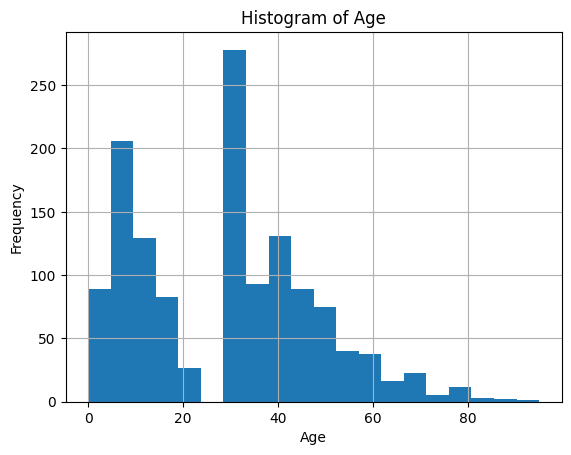

In [43]:
data['Age'].hist(bins = 20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

In [6]:
data["Age"] = data["Age"].fillna(data["Age"].median())
data["Insurance"] = data["Insurance"].fillna(data["Insurance"].mode()[0])
data["Debit card"] = data["Debit card"].fillna(data["Debit card"].mode()[0])
data["Cards"] = data["Cards"].fillna(data["Cards"].mode()[0])

In [42]:
data.isna().sum()

Cutomer id     0
Cards          0
Debit card     0
Insurance      0
Age            0
Cibil Score    0
Loan offer     0
dtype: int64

In [44]:
crosstab = pd.crosstab(data['Cibil Score'],data['Loan offer'],margins = True)
print(crosstab.head())
print(crosstab.tail())

Loan offer   0   1  All
Cibil Score            
0.0          2  18   20
0.004        0   2    2
0.005        1   6    7
0.007        0   1    1
0.008        0   1    1
Loan offer     0    1   All
Cibil Score                
93.0           1    0     1
96.007         1    0     1
111.405        1    0     1
173.604        1    0     1
All          685  655  1340


In [45]:
correlation_matrix = data.corr()

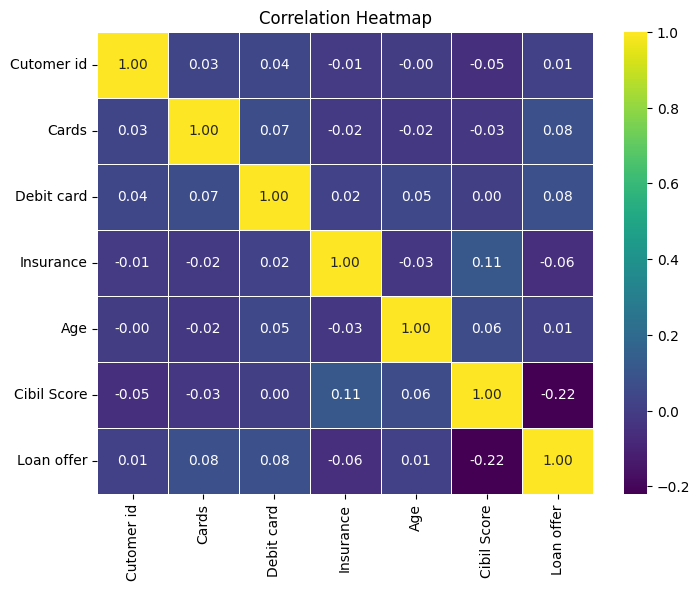

In [46]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [17]:
#Common models for classification tasks include logistic regression, decision trees, random forests, or support vector machines.
#since target value is binary,Logistic regression is best suitable for this
X = data[['Cards', 'Debit card', 'Insurance', 'Age', 'Cibil Score']]
y = data['Loan offer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the testing set
    predictions = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, predictions)
    print(f'{model_name} Accuracy: {accuracy}')

Logistic Regression Accuracy: 0.753731343283582
Decision Tree Accuracy: 0.6567164179104478
Random Forest Accuracy: 0.7276119402985075
Support Vector Machine Accuracy: 0.7238805970149254


In [11]:
# since randome forest has more accuract i choose random forest


In [27]:
model = LogisticRegression()
res = model.fit(X_train, y_train)
# Print the coefficients and intercept
print("Coefficients:", res.coef_)
print("Intercept:", res.intercept_)


Coefficients: [[ 0.30346625  0.52622405 -0.67906007  0.0051861  -0.37880716]]
Intercept: [-0.02587992]


In [28]:
from sklearn.metrics import roc_curve, roc_auc_score

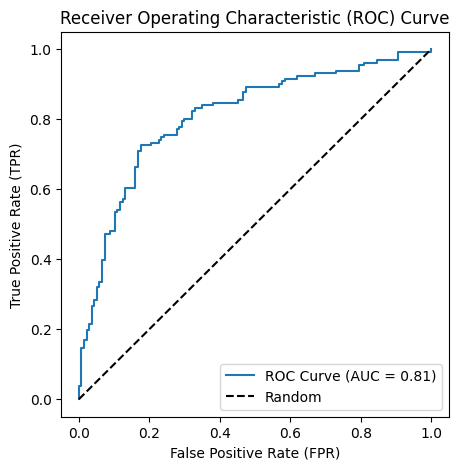

In [31]:
y_probs = res.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [3]:
df = pd.read_excel('D:\PROJECTS\Final Project\Data set.xlsx', "customer data")

In [6]:
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

X = df.drop('income', axis=1)
y = df['income']



In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)


RandomForestClassifier()

In [10]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
kmeans_model = KMeans(n_clusters=2, random_state=42)  # Assuming 2 clusters based on '<=50K' and '>50K'
kmeans_model.fit(X_train)


KMeans(n_clusters=2, random_state=42)

In [12]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [13]:
decision_tree_predictions = decision_tree_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)
knn_predictions = knn_model.predict(X_test)
kmeans_predictions = kmeans_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)

In [14]:
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
kmeans_accuracy = accuracy_score(y_test, kmeans_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Print the accuracies
print(f'Decision Tree Accuracy: {decision_tree_accuracy}')
print(f'Random Forest Accuracy: {random_forest_accuracy}')
print(f'KNN Accuracy: {knn_accuracy}')
print(f'K-Means Accuracy: {kmeans_accuracy}')
print(f'SVM Accuracy: {svm_accuracy}')

Decision Tree Accuracy: 0.47169618179957007
Random Forest Accuracy: 0.558603746545194
KNN Accuracy: 0.4722080049135019
K-Means Accuracy: 0.4370969392977787
SVM Accuracy: 0.5289180059371481
